# 等価回路のシンプル化　by SymPy
Libraries : Sympy, Control, Numpy, Pandas, math, Matplotlib   
抵抗の等価回路の計算　  
関連記事  
[【インピーダンス】今更ながらのLRC電気回路とBode,Niquistと伝達関数【Sympy control】](https://tom2rd.sakura.ne.jp/wp/2023/07/26/post-13277/)  
[【Python】インピーダンスから等価回路の常数を推定するライブラリ【複素数】](https://tom2rd.sakura.ne.jp/wp/2023/07/12/post-13233/)

In [ ]:
♯Sympyで、変数を定義　以下は文字として扱われる

from sympy import *
t=Symbol('t', real=True)
s=Symbol('s', real=True, positive=True)
R1=Symbol('R1', real=True, positive=True)
R2=Symbol('R2', real=True, positive=True)
R3=Symbol('R3', real=True, positive=True)
C1=Symbol('C1', real=True, positive=True)
C2=Symbol('C2', real=True, positive=True)
C3=Symbol('C3', real=True, positive=True)
L1=Symbol('L1', real=True, positive=True)
L2=Symbol('L2', real=True, positive=True)
L3=Symbol('L3', real=True, positive=True)

# 抵抗の等価回路
Rs 抵抗値
Ls　表皮効果など
Cp　寄生容量

![Resistor](./EquivalentCircuit/Resistor.png)

Sympy　での計算　カッコの位置などを確認するため

In [ ]:
♯ Fは ラプラス変換表記 R1とL1が直列それにCが並列した合成インピーダンス
F=1/((1/(R1+s*L1))+(s*C1))

In [ ]:

# F 式の形をみてみる。
F

1/(C1*s + 1/(L1*s + R1))

In [ ]:
♯式を展開
F.simplify()

(L1*s + R1)/(C1*s*(L1*s + R1) + 1)

In [ ]:
♯SympyのPhyics Controlライブラリを使って、伝達関数化　R1,L1,C1に値を代入して、Gという伝達関数にしてる
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import bode_plot
G=F.subs([(R1,1E+5),(L1,5.5E-2),(C1,2.14E-11)])
G

1/(4.48e-6*s + 1/(0.011*s + 10000.0))

In [ ]:
G.subs(s,1000)

99841.2222712210

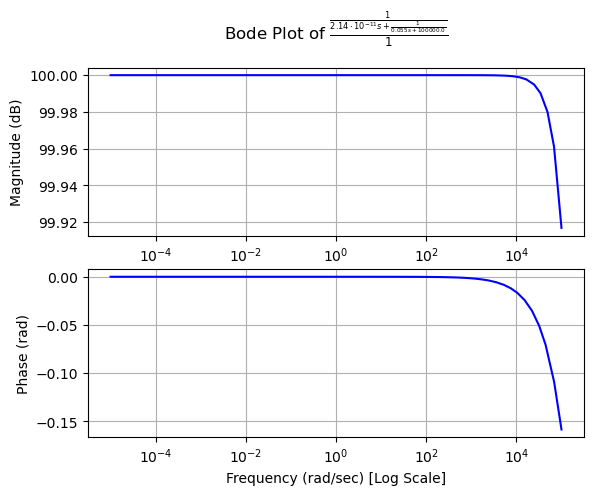

In [ ]:
tf1 = TransferFunction(G,1, s)
bode_plot(tf1)   

ここまでで、一応、式の形を確認する。R1,L1,C1の値はいろいろ入れて、グラフの形を確認しておく。　

# Numpy で　数値的に計算
式が正しいと、数値的に計算できる。Sympy のLamdifyを使ってもNumpy形式の数値列にも変換できる

In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def bodeHz(freq,G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(freq, np.abs(G))
    plt.xlabel("Frequency(Hz)")
    ax_mag.set_ylabel("Magnitude|G| ohm")
    ax_phase.semilogx(freq,  np.unwrap(np.angle(G)))
    ax_phase.set_ylabel("Phase(Rad)")

In [42]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')

In [43]:
freqs=np.geomspace(1,1E+8,100)
s=(freqs/(2*math.pi))*1j

Imedance.py で予測した結果を　代入する　インピーダンス（F）の式は、上のSympyで入れたものを、そのまま
式ですが、数値列です。Sの値は、周波数から作り、定数もそのまま代入します。

In [48]:
R1=1.00e+05
#L1=1.1E-9
#C1=4.48E-12
L1=2.54e-02
C1=2.14e-11
#R0 = 1.00e+05  (+/- 6.98e-08) [Ohm]
#     L0 = 5.54e-02  (+/- 2.88e-02) [H]
#     C0 = 2.14e-11  (+/- 6.79e-10) [F]

F=1/((1/(R1+s*L1))+(s*C1))

In [ ]:
(F[:0])

array([99999.99999999-0.03001662j])

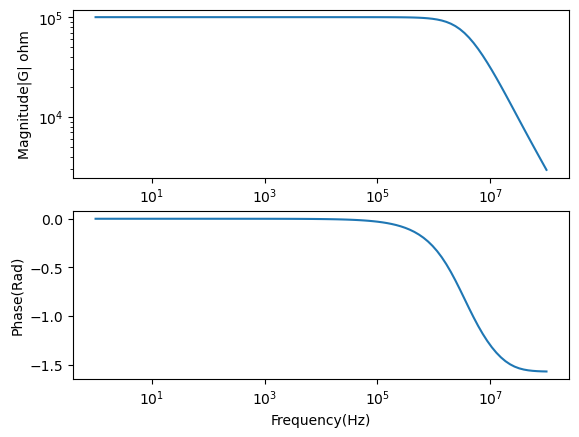

In [ ]:
bodeHz(freqs,F)

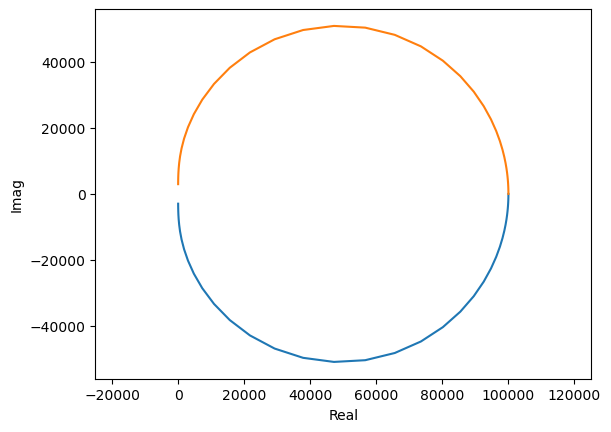

In [ ]:
nyquist(F)

# 測定値と比べる  
Gain PhaseのCSVを、読み込み、Impedance.pyでわかる形に収納してます  
Impedance.py は　real imaginary の複素数  
そのままプロット

C:\Users\tom2r\AppData\Local\Temp\ipykernel_2008\2443829021.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filename,skiprows=4,skipfooter=1)


<Figure size 640x480 with 0 Axes>

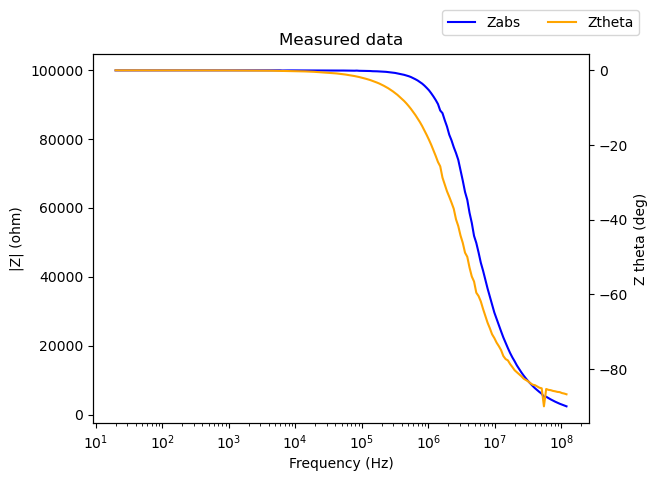

In [52]:
import numpy as np
import pandas as pd

filename='data2/100K OHM.CSV'
with open(filename) as f:
    df = pd.read_csv(filename,skiprows=4,skipfooter=1)

aZt = df.values
freq_array = np.array(aZt[:,0])
Zabs_array = np.array(aZt[:,1])
Theta_array = np.array(aZt[:,2])

#-------------------
import matplotlib.pyplot as plt
fig = plt.figure()

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (ohm)')
ax2 = ax1.twinx()
ax2.set_ylabel('Z theta (deg)')
ax1.plot(freq_array,Zabs_array,color='blue',label="Zabs")
ax2.plot(freq_array,Theta_array,color='orange',label="Ztheta")
fig.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1,ncol=2)
plt.title('Measured data')
plt.xscale('log')
plt.show()

#-------------------
import cmath
import math
# |Z|と偏角のデータから、実部・虚部に変換する
Zcomp_array = [cmath.rect(Zabs, theta*math.pi/180.0) for Zabs, theta in zip(Zabs_array, Theta_array)]
Zcomp_array=np.array(Zcomp_array)
from impedance import preprocessing
# 第 1 象限にインピーダンス データのみを保持する
frequencies, Z = preprocessing.ignoreBelowX(freq_array, Zcomp_array)

# Numpyで計算した結果と、比較　プロット

<Figure size 640x480 with 0 Axes>

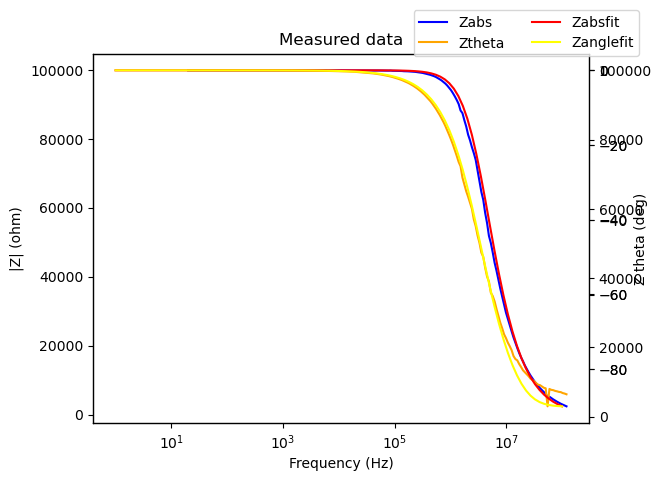

In [55]:
fig = plt.figure()

fig, ax1 = plt.subplots()
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('|Z| (ohm)')
ax2 = ax1.twinx()
ax2.set_ylabel('Z theta (deg)')
ax1.plot(freq_array,Zabs_array,color='blue',label="Zabs")
ax2.plot(freq_array,Theta_array,color='orange',label="Ztheta")
ax3 = ax1.twinx()
ax3.plot(freqs,np.abs(F),color='red',label="Zabsfit")
ax4 = ax1.twinx()
ax4.plot(freqs,np.angle(F,deg=True),color='yellow',label="Zanglefit")

fig.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1,ncol=2)
plt.title('Measured data')
plt.xscale('log')
plt.show()

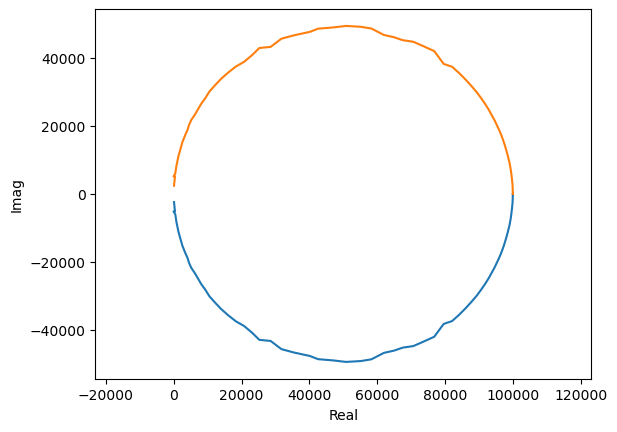

In [56]:
nyquist(Z)

# 関連記事


[【インピーダンス】今更ながらのLRC電気回路とBode,Niquistと伝達関数【Sympy control】](https://tom2rd.sakura.ne.jp/wp/2023/07/26/post-13277/)  
[【Python】インピーダンスから等価回路の常数を推定するライブラリ【複素数】](https://tom2rd.sakura.ne.jp/wp/2023/07/12/post-13233/)